## Analyze Fiit's Like Study (Line) Data

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt
import seaborn as sns
import os


sns.set_theme(style = "whitegrid")

In [2]:
_dir = r"DualSensorMouse_Fittslike_Rail\Logs"

In [3]:
Try = "1"
UserName = "BMH"

In [4]:
_dirCC = _dir+f"\{UserName}\{Try}"

In [5]:
dirlstWW = os.listdir(_dirCC)

dirlstWW

['BMH_rail_010_1',
 'BMH_rail_010_2',
 'BMH_rail_010_3',
 'BMH_rail_010_4',
 'BMH_rail_010_5',
 'BMH_rail_010_6',
 'BMH_rail_010_7',
 'BMH_rail_010_8',
 'BMH_rail_010_9']

---

Max Peak at 010_1: 0.588
Max Peak at 010_2: 0.713
Max Peak at 010_3: 0.855
Max Peak at 010_4: 0.549
Max Peak at 010_5: 0.624
Max Peak at 010_6: 0.750
Max Peak at 010_7: 0.564
Max Peak at 010_8: 0.603
Max Peak at 010_9: 0.649
Max Peak at 010_9: 0.490
Max Peak at 010_9: 0.205


ValueError: `dataset` input should have multiple elements.

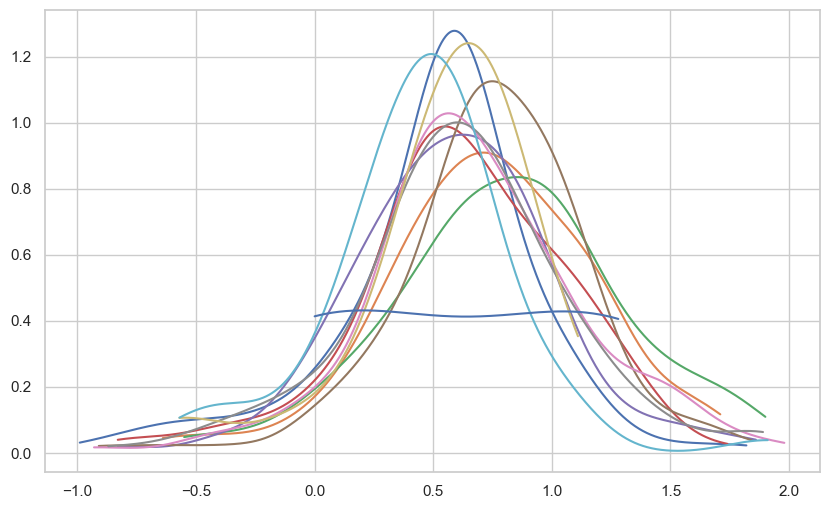

In [6]:
dflstW = [f.path for f in os.scandir(_dirCC) if f.is_dir()]
max_densityV = []

colors = plt.cm.viridis(np.linspace(0, 1, len(dflstW)))

plt.figure(figsize=(10, 6))

for subdir in dflstW:
    subdir_parts = subdir.split('_')
    subdir_info = {
        "User": subdir_parts[2],
        "Type": subdir_parts[3],
        "SenP": subdir_parts[4],
        "Trial": subdir_parts[5]
    }
    subdir_shortened = f"{subdir_info['SenP']}_{subdir_info['Trial']}"
    subdir_path = subdir
    
    subsubdirs = [d for d in os.listdir(subdir_path) if os.path.isdir(os.path.join(subdir_path, d))]
    for subsubdir in subsubdirs:
        subsubdir_path = os.path.join(subdir_path, subsubdir)
        Dirw = os.path.join(subsubdir_path, "Pos_values.csv")

        data = pd.read_csv(Dirw)
        data = data[(data["PositionValue"] >= -1) & (data["PositionValue"] <= 2)]

        kde = gaussian_kde(data["PositionValue"])
        x_values = np.linspace(data["PositionValue"].min(), data["PositionValue"].max(), 1000)
        densities = kde.evaluate(x_values)
        max_density_x = x_values[np.argmax(densities)]
        max_densityV.append(max_density_x)
        print(f"Max Peak at {subdir_shortened}: {max_density_x:.3f}")
        #plt.axvline(x=max_density_x, color='r', linestyle='--', label=f'Max Peak at {max_density_x:.2f}')
        
        plt.plot(x_values, densities, label=subdir_shortened)  # 각 선에 레이블 추가

meanMD = sum(max_densityV) / len(max_densityV)

print(f"Mean of Max Peak: {meanMD:.3f}")

plt.legend()
plt.title('Kernel Density Estimate for PositionValue')
plt.xlabel('PositionValue')
plt.ylabel('Density')
plt.show()

CoM of 010_1: 0.513
CoM of 010_2: 0.740
CoM of 010_3: 0.813
CoM of 010_4: 0.622
CoM of 010_5: 0.588
CoM of 010_6: 0.751
CoM of 010_7: 0.674
CoM of 010_8: 0.622
CoM of 010_9: 0.556
CoM of 010_9: 0.449
CoM of 010_9: 0.627


TypeError: no numeric data to plot

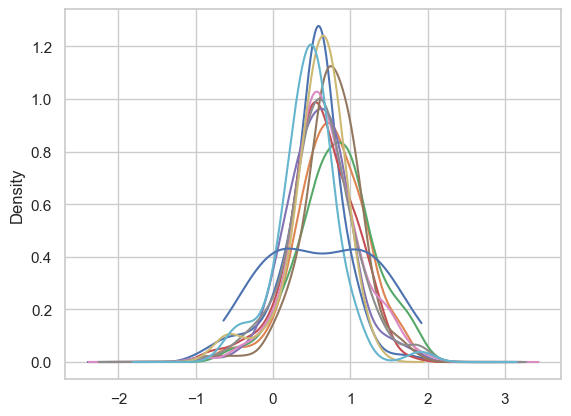

In [7]:
dflstW = []
CoM_values = []

# 각 하위 디렉토리에 대해 또 다른 하위 디렉토리 탐색
for subdir in dirlstWW:
    subdir_parts = subdir.split('_')
    # 필요한 값만 선택하여 저장
    subdir_info = {
        "User": subdir_parts[0],
        "Type": subdir_parts[1],
        "SenP": subdir_parts[2],
        "Trial": subdir_parts[3]
    }
    subdir_shortened = f"{subdir_info['SenP']}_{subdir_info['Trial']}"
    subdir_path = os.path.join(_dirCC, subdir)
    
    # 또 다른 하위 디렉토리 목록 가져오기
    subsubdirs = [d for d in os.listdir(subdir_path) if os.path.isdir(os.path.join(subdir_path, d))]
    # 또 다른 하위 디렉토리에서 Pos_values.csv 파일 찾기
    for subsubdir in subsubdirs:
        subsubdir_path = os.path.join(subdir_path, subsubdir)
        Dirw = os.path.join(subsubdir_path, "Pos_values.csv")
        if os.path.exists(Dirw):
            #if subdir_info["Trial"] == "1":  #통계 조건만 빼서 보고 싶을 때 사용
                dfw = pd.read_csv(Dirw)
                dfw = dfw[(dfw["PositionValue"] >= -1) & (dfw["PositionValue"] <= 2)]
                dflstW.append((dfw, subdir_shortened))  # 수정된 subdir 이름 사용

# 그래프 그리기
for dfw, subdir_shortened in dflstW:
    dfw["PositionValue"].plot.density(label=subdir_shortened)
    
    CoM = dfw["PositionValue"].mean()
    CoM_values.append(CoM)
    
    # CoM 출력
    print(f"CoM of {subdir_shortened}: {CoM:.3f}")

# CoM들의 평균 계산
CCoM = sum(CoM_values) / len(CoM_values)

print(f"CoM of CoMs: {CCoM:.3f}")

plt.legend()
plt.title('Trial '+Try+' ('+UserName+')')
plt.ylim(0, 2.0)
plt.xlim(-1,2)
plt.show()